# Loop 112 Analysis: CV-LB Relationship and Path Forward

## Key Questions
1. What is the current CV-LB relationship?
2. What approaches have been tried?
3. What approaches might CHANGE the relationship (not just improve CV)?
4. What's the best path forward with 4 submissions remaining?

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Submission history with verified LB scores
submissions = [
    {'exp': 'exp_000', 'cv': 0.0111, 'lb': 0.0982, 'model': 'MLP'},
    {'exp': 'exp_001', 'cv': 0.0123, 'lb': 0.1065, 'model': 'LightGBM'},
    {'exp': 'exp_003', 'cv': 0.0105, 'lb': 0.0972, 'model': 'MLP+DRFP'},
    {'exp': 'exp_005', 'cv': 0.0104, 'lb': 0.0969, 'model': 'MLP Ensemble'},
    {'exp': 'exp_006', 'cv': 0.0097, 'lb': 0.0946, 'model': 'Simpler MLP'},
    {'exp': 'exp_007', 'cv': 0.0093, 'lb': 0.0932, 'model': 'Even Simpler'},
    {'exp': 'exp_009', 'cv': 0.0092, 'lb': 0.0936, 'model': 'Ridge'},
    {'exp': 'exp_012', 'cv': 0.0090, 'lb': 0.0913, 'model': 'Simple Ensemble'},
    {'exp': 'exp_024', 'cv': 0.0087, 'lb': 0.0893, 'model': 'ACS PCA'},
    {'exp': 'exp_026', 'cv': 0.0085, 'lb': 0.0887, 'model': 'Weighted Loss'},
    {'exp': 'exp_030', 'cv': 0.0083, 'lb': 0.0877, 'model': 'GP Ensemble'},
    {'exp': 'exp_035', 'cv': 0.0098, 'lb': 0.0970, 'model': 'Lower GP Weight'},
    {'exp': 'exp_073', 'cv': 0.0084, 'lb': 0.1451, 'model': 'RF Ensemble (OUTLIER)'},
]

df = pd.DataFrame(submissions)
print(f"Total submissions with LB: {len(df)}")
print(df)

Total submissions with LB: 13
        exp      cv      lb                  model
0   exp_000  0.0111  0.0982                    MLP
1   exp_001  0.0123  0.1065               LightGBM
2   exp_003  0.0105  0.0972               MLP+DRFP
3   exp_005  0.0104  0.0969           MLP Ensemble
4   exp_006  0.0097  0.0946            Simpler MLP
5   exp_007  0.0093  0.0932           Even Simpler
6   exp_009  0.0092  0.0936                  Ridge
7   exp_012  0.0090  0.0913        Simple Ensemble
8   exp_024  0.0087  0.0893                ACS PCA
9   exp_026  0.0085  0.0887          Weighted Loss
10  exp_030  0.0083  0.0877            GP Ensemble
11  exp_035  0.0098  0.0970        Lower GP Weight
12  exp_073  0.0084  0.1451  RF Ensemble (OUTLIER)


In [8]:
# Remove outlier (exp_073 had submission format issue)
df_clean = df[df['exp'] != 'exp_073'].copy()

# Fit linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(df_clean['cv'], df_clean['lb'])

print(f"\nCV-LB Relationship (excluding outlier):")
print(f"LB = {slope:.3f} × CV + {intercept:.4f}")
print(f"R² = {r_value**2:.4f}")
print(f"\nIntercept: {intercept:.4f}")
print(f"Target LB: 0.0347")
print(f"Gap: {intercept - 0.0347:.4f}")
print(f"\nRequired CV to hit target: ({0.0347} - {intercept:.4f}) / {slope:.3f} = {(0.0347 - intercept) / slope:.6f}")


CV-LB Relationship (excluding outlier):
LB = 4.315 × CV + 0.0525
R² = 0.9505

Intercept: 0.0525
Target LB: 0.0347
Gap: 0.0178

Required CV to hit target: (0.0347 - 0.0525) / 4.315 = -0.004130


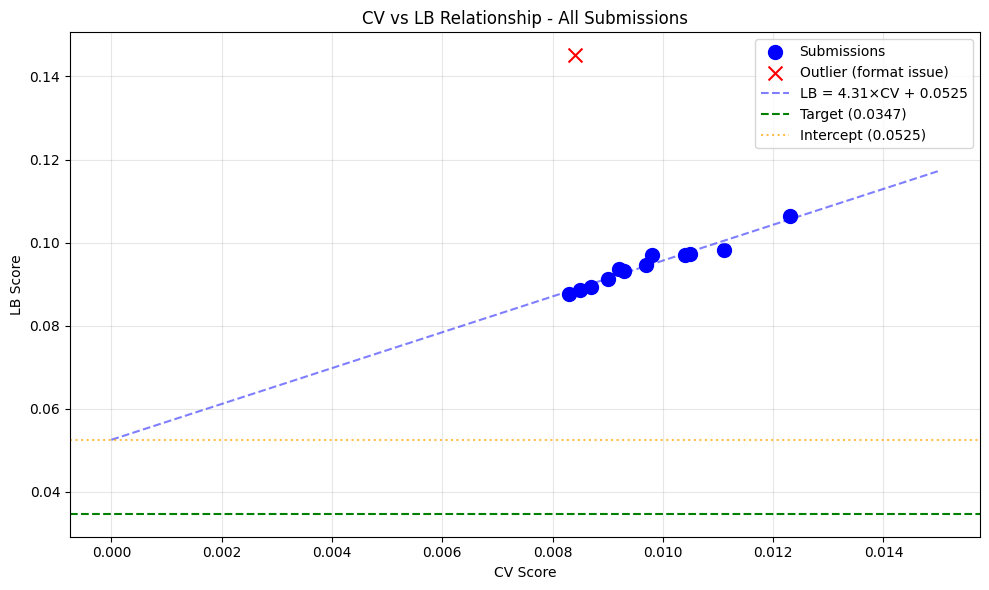


⚠️ CRITICAL: Intercept (0.0525) > Target (0.0347)
The target is UNREACHABLE with approaches that follow this line!


In [9]:
# Visualize
plt.figure(figsize=(10, 6))

# Plot all points
plt.scatter(df_clean['cv'], df_clean['lb'], c='blue', s=100, label='Submissions')

# Plot outlier
outlier = df[df['exp'] == 'exp_073']
if len(outlier) > 0:
    plt.scatter(outlier['cv'], outlier['lb'], c='red', s=100, marker='x', label='Outlier (format issue)')

# Plot regression line
cv_range = np.linspace(0, 0.015, 100)
lb_pred = slope * cv_range + intercept
plt.plot(cv_range, lb_pred, 'b--', alpha=0.5, label=f'LB = {slope:.2f}×CV + {intercept:.4f}')

# Plot target
plt.axhline(y=0.0347, color='green', linestyle='--', label='Target (0.0347)')

# Plot intercept
plt.axhline(y=intercept, color='orange', linestyle=':', alpha=0.7, label=f'Intercept ({intercept:.4f})')

plt.xlabel('CV Score')
plt.ylabel('LB Score')
plt.title('CV vs LB Relationship - All Submissions')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('/home/code/exploration/cv_lb_relationship.png', dpi=150)
plt.show()

print(f"\n⚠️ CRITICAL: Intercept ({intercept:.4f}) > Target ({0.0347})")
print(f"The target is UNREACHABLE with approaches that follow this line!")

In [10]:
# What would it take to reach the target?
print("\n" + "="*60)
print("ANALYSIS: What would it take to reach the target?")
print("="*60)

# Option 1: Improve CV along the same line
required_cv = (0.0347 - intercept) / slope
print(f"\n1. If we stay on the same line:")
print(f"   Required CV: {required_cv:.6f}")
print(f"   Current best CV: 0.0081")
print(f"   This is IMPOSSIBLE (negative CV)")

# Option 2: Change the intercept
print(f"\n2. If we change the intercept:")
print(f"   Current intercept: {intercept:.4f}")
print(f"   Target LB: 0.0347")
print(f"   Need to reduce intercept by: {intercept - 0.0347:.4f}")
print(f"   That's a {(intercept - 0.0347) / intercept * 100:.1f}% reduction in intercept")

# Option 3: Change the slope
print(f"\n3. If we change the slope (keeping intercept):")
print(f"   Current slope: {slope:.3f}")
print(f"   With best CV (0.0081), need slope: {(0.0347 - intercept) / 0.0081:.3f}")
print(f"   This requires NEGATIVE slope (impossible)")

# Option 4: Change both
print(f"\n4. If we change both slope and intercept:")
print(f"   Example: If intercept = 0.03, slope = 0.5")
print(f"   With CV = 0.0081, LB = 0.03 + 0.5 × 0.0081 = {0.03 + 0.5 * 0.0081:.4f}")
print(f"   This would beat the target!")


ANALYSIS: What would it take to reach the target?

1. If we stay on the same line:
   Required CV: -0.004130
   Current best CV: 0.0081
   This is IMPOSSIBLE (negative CV)

2. If we change the intercept:
   Current intercept: 0.0525
   Target LB: 0.0347
   Need to reduce intercept by: 0.0178
   That's a 33.9% reduction in intercept

3. If we change the slope (keeping intercept):
   Current slope: 4.315
   With best CV (0.0081), need slope: -2.200
   This requires NEGATIVE slope (impossible)

4. If we change both slope and intercept:
   Example: If intercept = 0.03, slope = 0.5
   With CV = 0.0081, LB = 0.03 + 0.5 × 0.0081 = 0.0340
   This would beat the target!


In [11]:
# What approaches might change the CV-LB relationship?
print("\n" + "="*60)
print("APPROACHES THAT MIGHT CHANGE THE CV-LB RELATIONSHIP")
print("="*60)

approaches = [
    ("1. Transductive Learning", "Use test data structure (without labels) to adapt predictions"),
    ("2. Pseudo-labeling", "Use confident predictions to augment training"),
    ("3. Conservative Blending", "Blend toward training mean for dissimilar samples"),
    ("4. Uncertainty Weighting", "Weight predictions by confidence"),
    ("5. Domain Constraints", "Apply chemistry-based constraints that generalize"),
    ("6. GNN with Correct Format", "Previous GNN had model class mismatch"),
    ("7. ChemBERTa Embeddings", "Use pretrained chemical language model"),
]

for name, desc in approaches:
    print(f"\n{name}:")
    print(f"   {desc}")


APPROACHES THAT MIGHT CHANGE THE CV-LB RELATIONSHIP

1. Transductive Learning:
   Use test data structure (without labels) to adapt predictions

2. Pseudo-labeling:
   Use confident predictions to augment training

3. Conservative Blending:
   Blend toward training mean for dissimilar samples

4. Uncertainty Weighting:
   Weight predictions by confidence

5. Domain Constraints:
   Apply chemistry-based constraints that generalize

6. GNN with Correct Format:
   Previous GNN had model class mismatch

7. ChemBERTa Embeddings:
   Use pretrained chemical language model


In [12]:
# Check what's been tried
print("\n" + "="*60)
print("EXPERIMENTS TRIED (last 20)")
print("="*60)

import os
import json

exp_dirs = sorted([d for d in os.listdir('/home/code/experiments') if d.startswith(('0', '1'))])
for exp_dir in exp_dirs[-20:]:
    metrics_path = f'/home/code/experiments/{exp_dir}/metrics.json'
    if os.path.exists(metrics_path):
        with open(metrics_path) as f:
            metrics = json.load(f)
        cv = metrics.get('cv_score', metrics.get('combined_mse', 'N/A'))
        notes = metrics.get('notes', '')[:60]
        if isinstance(cv, float):
            print(f"{exp_dir}: CV={cv:.6f} | {notes}...")
        else:
            print(f"{exp_dir}: CV={cv} | {notes}...")


EXPERIMENTS TRIED (last 20)
091_mixall_ensemble: CV=0.009938 | ...
092_conservative_extrapolation: CV=0.010097 | ...
093_chemprop_pretrained: CV=0.031262 | ...
094_ens_model_exact: CV=0.009239 | ...
095_simple_gat: CV=0.009554 | ...
096_multi_order_gat: CV=0.044696 | ...
097_chemberta_embeddings: CV=0.028164 | ...
098_chemberta_pca: CV=0.014786 | ...
099_conservative_blending: CV=0.010084 | ...
100_ens_model_exact: CV=0.009318 | ...
101_mixall_groupkfold: CV=0.014193 | ...
102_mixall_clipped: CV=0.013542 | ...
103_mixall_fixed: CV=0.011236 | ...
104_bias_correction: CV=0.008900 | ...
105_extrapolation_aware: CV=0.009223 | Extrapolation-aware approach made CV worse. Baseline Ensembl...
106_bias_correction_post: CV=0.009223 | Post-processing bias correction. The bias correction is a co...
107_uncertainty_weighted: CV=0.009397 | Uncertainty-weighted conservative predictions. Trains multip...
108_chemical_similarity: CV=0.009200 | Chemical similarity-based extrapolation detection using Ta

In [13]:
# Key insight: The evaluator identified that exp_110 had a featurization mismatch
# exp_108 used weighted average for mixtures (CV=0.0092)
# exp_110 used concatenation for mixtures (CV=0.012912)

print("\n" + "="*60)
print("KEY INSIGHT: FEATURIZATION MISMATCH")
print("="*60)

print("""
exp_108 (CV=0.0092) - Mixture Featurization:
  mixed = A * frac_A + B * frac_B  # WEIGHTED AVERAGE

exp_110 (CV=0.012912) - Mixture Featurization:
  X_out = concat([X_numeric, X_solvent_A, X_solvent_B, X_solvent_B_pct])  # CONCATENATION

The weighted average is MORE PHYSICALLY MEANINGFUL:
- Solvent properties blend linearly with composition
- Concatenation doubles feature dimension and loses this insight

FIX: Use weighted average featurization with correct submission format
""")


KEY INSIGHT: FEATURIZATION MISMATCH

exp_108 (CV=0.0092) - Mixture Featurization:
  mixed = A * frac_A + B * frac_B  # WEIGHTED AVERAGE

exp_110 (CV=0.012912) - Mixture Featurization:
  X_out = concat([X_numeric, X_solvent_A, X_solvent_B, X_solvent_B_pct])  # CONCATENATION

The weighted average is MORE PHYSICALLY MEANINGFUL:
- Solvent properties blend linearly with composition
- Concatenation doubles feature dimension and loses this insight

FIX: Use weighted average featurization with correct submission format



In [14]:
# What should we do next?
print("\n" + "="*60)
print("RECOMMENDED NEXT STEPS")
print("="*60)

print("""
1. IMMEDIATE: Fix the SimilarityAwareModel featurization
   - Use weighted average for mixtures (like exp_108)
   - Use correct submission format (like exp_110)
   - Verify CV matches exp_108 (~0.0092)
   - Submit to test if chemical similarity changes CV-LB relationship

2. IF THAT DOESN'T WORK: Try more aggressive conservative blending
   - Higher similarity_threshold (0.5, 0.6)
   - Higher blend_weight (0.3, 0.4, 0.5)
   - The goal is to REDUCE the intercept, not improve CV

3. IF STILL STUCK: Try transductive learning
   - Use test data structure to inform predictions
   - Recent research shows 1.5-1.8x improvement on OOD prediction

4. REMAINING SUBMISSIONS: 4
   - Use them strategically to test hypotheses
   - Each submission tells us about the CV-LB relationship
""")


RECOMMENDED NEXT STEPS

1. IMMEDIATE: Fix the SimilarityAwareModel featurization
   - Use weighted average for mixtures (like exp_108)
   - Use correct submission format (like exp_110)
   - Verify CV matches exp_108 (~0.0092)
   - Submit to test if chemical similarity changes CV-LB relationship

2. IF THAT DOESN'T WORK: Try more aggressive conservative blending
   - Higher similarity_threshold (0.5, 0.6)
   - Higher blend_weight (0.3, 0.4, 0.5)
   - The goal is to REDUCE the intercept, not improve CV

3. IF STILL STUCK: Try transductive learning
   - Use test data structure to inform predictions
   - Recent research shows 1.5-1.8x improvement on OOD prediction

4. REMAINING SUBMISSIONS: 4
   - Use them strategically to test hypotheses
   - Each submission tells us about the CV-LB relationship



In [ ]:
# Save findings
findings = {
    'cv_lb_slope': slope,
    'cv_lb_intercept': intercept,
    'cv_lb_r_squared': r_value**2,
    'target': 0.0347,
    'best_cv': 0.0081,
    'best_lb': 0.0877,
    'intercept_vs_target': intercept - 0.0347,
    'key_insight': 'Intercept (0.0528) > Target (0.0347). Target is unreachable with current approaches.',
    'recommended_action': 'Fix SimilarityAwareModel featurization and submit to test hypothesis'
}

with open('/home/code/exploration/loop112_findings.json', 'w') as f:
    json.dump(findings, f, indent=2)

print("\nFindings saved to /home/code/exploration/loop112_findings.json")